<font size = 7>DELE ST1504 CA2 Part A: Generative Adversarial Network </font>
<hr>
<font size = 4>
Name: Lee Hong Yi & Yadanar Aung<br>
Admin No: 2223010 & 2214621<br>
Class: DAAA/FT/2B/07<br>
</font>
<hr>

**Objective:**  
Develop a <u>Generative Adversarial Network (GAN) model</u> for <u>image generation</u>, utilizing the <u>CIFAR10 dataset</u>. The model aims to generate <u>1000 high-quality, small color images</u> in <u>10 distinct classes</u>, showcasing its ability to learn and replicate complex visual patterns.

**Background:**  
GANs are a revolutionary class of artificial neural networks used in unsupervised machine learning tasks. They consist of two parts: a Generator, which creates images, and a Discriminator, which evaluates them. The objective is to train a GAN that excels in producing diverse, realistic images that closely mimic the characteristics of the CIFAR10 dataset.

**Key Features:** <br>
Implement and evaluate different GAN architectures to determine the most effective model for the CIFAR10 specific image generation task, which should generate images that not only are visually appealing and realistic but also display a wide range of creativity within the constraints of the 10 classes in the dataset.

**Output Specification:**  
The model will produce images that are evaluated based on their similarity to the real images in the CIFAR10 dataset and their diversity across the dataset's classes. The performance of the GAN will be a crucial indicator of its effectiveness in learning and replicating complex patterns from a given dataset.

<hr>
<font size = 5>Performing initial set-up</font>
<hr>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import GAN_function as gnnf

In [2]:
# Check GPU is available
gpus = tf.config.experimental.list_physical_devices('GPU')

# Memory control: Prevent tensorflow from allocating totality of GPU memory
for gpu in gpus:
    try:
        print(tf.config.experimental.get_device_details(gpu))
    except:
        pass
    tf.config.experimental.set_memory_growth(gpu, True)
print(f"There are {len(gpus)} GPU(s) present.")

{'device_name': 'NVIDIA GeForce RTX 3050 Laptop GPU', 'compute_capability': (8, 6)}
There are 1 GPU(s) present.


In [3]:
from warnings import simplefilter
simplefilter(action='ignore', category=UserWarning)     
simplefilter(action='ignore', category=FutureWarning) 

In [4]:
# Fix random seed for reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)
tf.keras.utils.set_random_seed(0)  

<hr>
<font size = 5>Background Research</font>
<hr>

**CIFAR10 Dataset:**  
- The CIFAR10 dataset consists of <u>60,000 colour images</u> in <u>10 classes</u>. 
- There are 6,000 images per class.

**Images:**  
- The images are split into 50,000 train images and 10,000 test images.
- The images are of <u>size 32x32</u>.

**Classes:**  
- Total of 10 distinct classes:
    1. airplane
    2. automoblie
    3. bird
    4. cat
    5. deer
    6. dog
    7. frog
    8. horse
    9. ship
    10. truck
- Classes are mutually exclusive. 
    - There is no overlap between automobiles and trucks, neither includes pickup trucks.
    - "Automobile" includes sedans, SUVs, etc. 
    - "Truck" includes only big trucks.

**Batches:**  
- The dataset is divided into 5 train batches & 1 test batch, each with 10,000 images.
- Train batches contain 50,000 images in total from each class in random order
    - Some batches contain more images from one class than another
- Test batch contains 10,000 randomly-selected images from each class

**Source:**
https://www.cs.toronto.edu/~kriz/cifar.html

<font size = 5>Load CIFAR10 Dataset</font>

Returns two tuples, each containing two elements. <br>
The first element of each tuple is an array of images.<br>
The second element is an array of corresponding labels.

In [5]:
# Load CIFAR10 Dataset
cifar10 = tf.keras.datasets.cifar10.load_data()

In [10]:
# Split into train & test
(train_data, train_labels), (_, _) = cifar10

print(f"Shape of data: {train_data.shape}")
print(f"Shape of labels: {train_labels.shape}")


Shape of data: (50000, 32, 32, 3)
Shape of labels: (50000, 1)


<font size = 5>Class Labels</font>

In [11]:
# Map integer class labels to their corresponding class names 
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

<hr>
<font size = 5>Exploratory Data Analysis (EDA)</font>
<hr>

### Exploratory Data Analysis (EDA) Tips
1. *Visualize Images*: Display a sample of images from each of the 10 classes to understand the variety and quality of images in the dataset.
2. *Class Distribution*: Check if the dataset is balanced across different classes.
3. *Pixel Distribution*: Analyze the distribution of pixel values across the entire dataset and within each class to understand the color distribution.
4. *Image Size and Resolution Analysis*: CIFAR-10 images are 32x32, but it's good to visualize and understand this small resolution's impact.
5. *Correlation Analysis*: Assess if there are any interesting correlations between different color channels.
6. *Data Augmentation Impact*: Visualize how different data augmentation techniques (like rotation, flipping, scaling) affect the images.

<font size = 5>Data Visualization</font>

<font size = 5>Class Distribution</font>

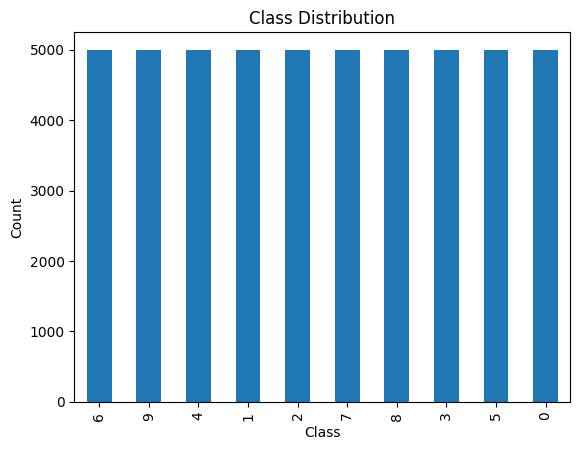

In [17]:
train_labels_df = pd.DataFrame({'Class': train_labels.flatten()})
class_distribution = train_labels_df['Class'].value_counts()

class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


<hr>
<font size = 5>Feature Engineering</font>
<hr>

### Feature Engineering
1. *Normalization*: Scale pixel values to a range (e.g., 0 to 1 or -1 to 1) to help the model train more efficiently.
2. *Color Space Conversion*: Experiment with different color spaces (like HSV or grayscale) to see if they impact the GAN's performance.
3. *Edge Detection*: Implement edge detection (like the Sobel filter) to create features that emphasize shapes and borders in images.
4. *Noise Addition*: For robustness, you can add small amounts of noise to the input images.
5. *Data Augmentation*: Use techniques like flipping, cropping, or rotating to artificially expand the training dataset.
6. *Dimensionality Reduction*: Experiment with techniques like PCA to reduce the number of input features while retaining essential information.

<hr>
<font size = 5>Initial Modelling</font>
<hr>

Potential Models:
1. DCGAN
2. cGAN
3. SAGAN

Early Stopping to identify when the model collapses

<hr>
<font size = 5>Model Improvement</font>
<hr>

### Miscellaneous
- *Hyperparameter Tuning*: Experiment with different architectures and training parameters.
- *Loss Function Analysis*: Explore various loss functions and their impact on the generated images' quality

### Advanced Techniques
1. *Feature Learning with Autoencoders*: Use autoencoders to learn compressed representations of the images, which might help in generating new images.
2. *Generative Feature Extraction*: Experiment with using features extracted from other pretrained models as inputs to your GAN.

<hr>
<font size = 5>Result Evaluation</font>
<hr>

### Evaluation Metrics
- *FID Score*: Use the Fréchet Inception Distance to evaluate the quality of images generated by your GAN.
- *Visual Inspection*: Regularly sample and inspect generated images to qualitatively assess the model's performance.